# Analysis of activity in the pictures

In this notebook I am taking the data I saved regarding my pictures on Unsplash, and I analyze the activity. 

I am curious about how and if the views and downloads correlate, and what do the most downloaded pictures have in common (mostly tag wise). 

If you want to check some (not amazing, but free to use) pictures, [check out my unsplash account](https://unsplash.com/@yogne)!

The next iteration will include getting the number of days that the picture has been live - some picture might have more interraction, however, gathering 200 downloads in 2 years can be still less than gathering 100 likes in just 2 weeks of being live. 

A future iteration would include gathering time series data (activity per days as opposed to just aggregate) and looking into possible insights there. 



In [79]:
import pandas as pd
import json
from ast import literal_eval
import altair as alt
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display


#### First, we gather the data

In [98]:
df_photos = pd.read_csv("./data/photos.csv")
df_tags = pd.read_csv("./data/tags.csv", converters={"tags": literal_eval})


In [99]:
df_merged = pd.merge(df_photos, df_tags, on="id")
df_merged

,id,url,views,downloads,likes,tags,tags_count
0,d5HkawVDFWs,https://images.unsplash.com/photo-167801460841...,186,1,0,"[france, annecy, city at night, religious, dar...",20
1,qOJagwP9AH4,https://images.unsplash.com/photo-167718248759...,1396,2,0,"[france, cannes, sea, cote d'azure, port, shor...",17
2,ayNtUoUd_Mg,https://images.unsplash.com/photo-167718248015...,1661,32,0,"[france, cannes, port, boat, sea, beach backgr...",20
3,QvW1NO_cgJc,https://images.unsplash.com/photo-167718230296...,2849,61,0,"[france, cannes, boat, shore, cote d'azure, ya...",20
4,TaIHXYbBBXM,https://images.unsplash.com/photo-167718230256...,2970,60,0,"[france, cannes, boat, shore, sea ​​shore, arc...",20
5,xTfmtxO9f_w,https://images.unsplash.com/photo-167718216220...,2923,54,0,"[cannes, france, sea, palm tree, sunset, sunse...",20
6,w8NjrSOPjY8,https://images.unsplash.com/photo-167718225145...,2873,24,0,"[cannes, france, boat, sea, beach background, ...",19
7,85UinCrJc3Q,https://images.unsplash.com/photo-166245062081...,1122,18,0,"[spain, zaragoza, city, day, people, church, c...",20
8,YieB0alU9p4,https://images.unsplash.com/photo-165942315997...,9240,18,0,"[barcelona, spain, balcony, dog, plant, green,...",19
9,HNZb5jhftN0,https://images.unsplash.com/photo-165765050525...,10898,106,0,"[grey, paris, france, pollution, smoke, landsc...",19


#### Then, we look at some overall values for each picture

In [100]:
x = df_merged["id"].to_list()
y1 = df_merged["views"].to_list()
y2 = df_merged["downloads"].to_list()

data = pd.DataFrame({'x': x, 'a) views': y1, 'b) downloads': y2})

In [101]:
melted_data = pd.melt(data, id_vars=['x'], value_vars=['a) views', 'b) downloads'], var_name='quantity', value_name='value')
chart = alt.Chart(melted_data).mark_bar().encode(
    x=alt.X('x:N', axis=alt.Axis(title='Photos', labels=False)),
    y=alt.Y('value:Q', axis=alt.Axis(title='', labelFontSize=14, titleFontSize=16, titleFontWeight='bold')),
    color=alt.Color('quantity:N', legend=alt.Legend(title='Quantities')),
    tooltip=['x', 'value']
).properties(
    title=alt.TitleParams('Bar chart with views and downloads', fontSize=16, fontWeight='bold'),
    width=500,
    height=400
).interactive()

# Make the chart zoomable
zoomable_chart = chart.properties(
    selection=alt.selection_interval(bind='scales', zoom=True)
)

# Show the chart
zoomable_chart.show()

Displaying chart at http://localhost:53980/


By running the cell above, a window with a zoomable chart will open. The two pictures below are screenshots from the respective chart. 

<div style="display:flex">
    <img src="./figures/viz_whole.svg" style="width:50%">
    <img src="./figures/viz_zoom.svg" style="width:50%">
</div>

From the two plots, one can notice that the shape of the views is not very similar to the shape of the downloads - this means that exposure alone to the users will not do much without other factors.

In [102]:
df_merged["downloads_views_ratio"] = df_merged.apply(lambda row: row["downloads"]/row["views"], axis=1)
y_ratio = df_merged["downloads_views_ratio"].to_list() 
data_ratio = pd.DataFrame({'x': x, 'downloads_views_ratio': y_ratio})


In [103]:
melted_data = pd.melt(data_ratio, id_vars=['x'], value_vars=['downloads_views_ratio'], var_name='quantity', value_name='value')
chart = alt.Chart(melted_data).mark_bar().encode(
    x=alt.X('x:N', axis=alt.Axis(title='Photos', labels=False)),
    y=alt.Y('value:Q', axis=alt.Axis(title='downloads/views ratio', labelFontSize=14, titleFontSize=16, titleFontWeight='bold')),
    color=alt.Color('quantity:N', legend=alt.Legend(title='Quantities')),
    tooltip=['x', 'value']
).properties(
    title=alt.TitleParams('Bar chart with the ratio of views and downloads', fontSize=16, fontWeight='bold'),
    width=500,
    height=400
).interactive()

# Make the chart zoomable
zoomable_chart = chart.properties(
    selection=alt.selection_interval(bind='scales', zoom=True)
)

# Show the chart
zoomable_chart.show()

Displaying chart at http://localhost:53980/


<div style="display:flex">
    <img src="./figures/downloads_views_ratio.svg" style="width:70%">

</div>

#### We will look at the top pictures with respect to three KPIs

I am considering three KPIs: views, downloads, as well as a heuristic engagement metric: the ration between downloads and views. This is computed by diving the number of downloads by the number of views. A higher ratio indicates more engagement. 

In [104]:
# get top 5 most viewed
top5_viewed = df_merged.nlargest(5, 'views')
# get top 5 most downloaded 
top5_downloaded = df_merged.nlargest(5, 'downloads')
# get top 5 highest ratio
top5_ratio = df_merged.nlargest(5, 'downloads_views_ratio')

In [105]:
all_ids = set(top5_viewed["id"].to_list() + \
              top5_downloaded["id"].to_list() + top5_ratio["id"].to_list())

In [106]:
df_merged.set_index(["id"], inplace=True)

In [107]:
def get_url_top_views_and_downloads(id):
    if id in top5_viewed['id'].values and id in top5_downloaded['id'].values:
        return top5_viewed.loc[top5_viewed['id'] == id, 'url'].values[0]
    else:
        return None

common_pictures_views_downloads = list(map(lambda x: get_url_top_views_and_downloads(x), all_ids))

In [108]:
def get_url_top_ratio_and_downloads(id):
    if id in top5_ratio['id'].values and id in top5_downloaded['id'].values:
        return top5_downloaded.loc[top5_downloaded['id'] == id, 'url'].values[0]
    else:
        return None

common_pictures_ratio_downloads = list(map(lambda x: get_url_top_ratio_and_downloads(x), all_ids))

In [109]:
def display_image_from_url(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    image = image.resize((350, 200))
    display(image)


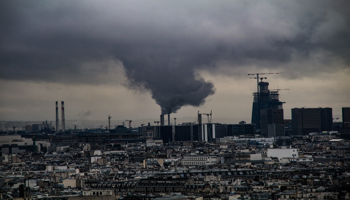

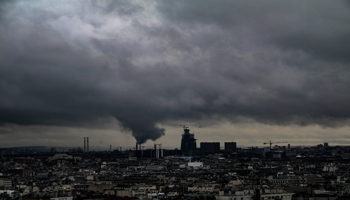

In [110]:
for url in common_pictures_views_downloads:
    if url:
        display_image_from_url(url)

These pictures are among the most viewed and most downloaded. By the virtue of being seen by ~10 000 people, these picture gatheres a high number of downloads (compared to my other pictures :) )

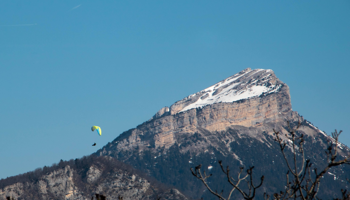

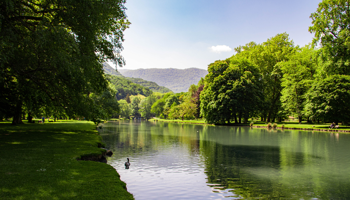

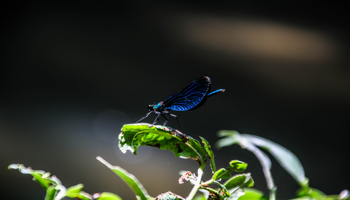

In [111]:
for url in common_pictures_ratio_downloads:
    if url:
        display_image_from_url(url)

These pictures don't have as many views, however, their ratio of downloads/views is pretty high. More users among the ones that had the chance to see the pictures, also downloaded these pictures. 

#### Tematic similarities - Let's explore the tags

This will come in a further commit :) 

#### A different perspective given by the upload date

This will come in a further commit :) 